# Задача 1. Минимизация гладкой функции
### Рассмотрим все ту же функцию из задания по линейной алгебре:   
  f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]  

In [39]:
import numpy as np
from numpy import sin, exp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(
    font_scale=1,
    style='whitegrid',
    rc={'figure.figsize':(10,8)}
)

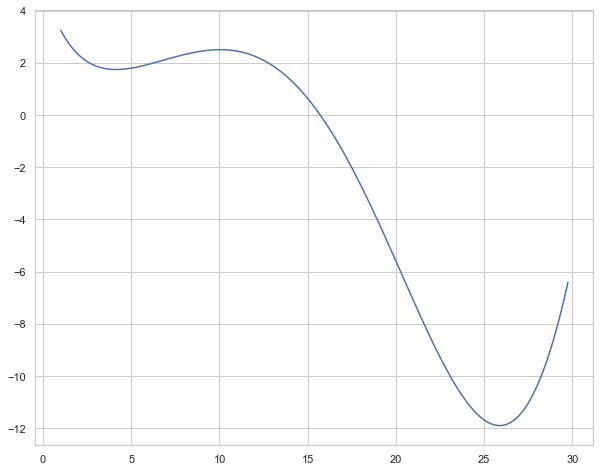

In [46]:
f = lambda x: sin(x/5) * exp(x/10) + 5*exp(-x/2)

a = np.arange(1, 30, 0.25)

plt.plot(a, f(a))

### 2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize.   
Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

### 3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. 
 Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.


In [48]:
def evaluate(func, x):
    return(func(x))

evaluate(f, 26)

-11.894590748771716

### 4. Изучите примеры использования  scipy.optimize.minimize в документации Scipy (см. "Материалы")
https://docs.scipy.org/doc/scipy/reference/optimize.html

### 5. Попробуйте найти минимум, используя стандартные параметры в функции  scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). 
 Попробуйте менять начальное приближение и изучить, меняется ли результат. 


In [49]:
import scipy

In [63]:
scipy.optimize.minimize(f, 0.0005)

      fun: 1.7452682903319852
 hess_inv: array([[6.02471624]])
      jac: array([-2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([4.1362883])

In [64]:
evaluate(f, 4.13628816)

1.7452682903319965

<b>Вывод</b>: такой метод нашёл локальный минимум функции

### 6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. 
 Градиент функции при этом указывать не нужно – он будет оценен численно.   
 Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.


In [186]:
ans = scipy.optimize.minimize(fun=f, x0=2, method='BFGS')
ans

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

In [187]:
round(ans.fun, 2)

1.75

### 7. Теперь измените начальное приближение на x=30.   
 Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.


In [188]:
ans_2 = scipy.optimize.minimize(fun=f, x0=30, method='BFGS')
ans_2

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

In [189]:
round(ans_2.fun, 2)

-11.9

### 8. Стоит обдумать полученный результат. 
Почему ответ отличается в зависимости от начального приближения?   
Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали.   
В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.


# Задача 2. Глобальная оптимизация

### 1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.


### 2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

### 3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple).   
Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.


### 4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30].
Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.


In [190]:
ans_3 = scipy.optimize.differential_evolution(f, [(1,30)])
ans_3

     fun: array([-11.89889467])
     jac: array([5.32907008e-07])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 4
 success: True
       x: array([25.88019401])

In [191]:
ans_3.fun[0].round(2)

-11.9

### 5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.


### 6. Сравните количество итераций, 
потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции.   
При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS.   
Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS.   
Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше.   
Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.


In [105]:
print('Iterations:')
print('BFGS:',scipy.optimize.minimize(fun=f, x0=30, method='BFGS').nit)
print('dif_evo:',scipy.optimize.differential_evolution(f, [(1,30)]).nit)

Iterations:
BFGS: 6
dif_evo: 4


In [106]:
print('Nfev:')
print('BFGS:',scipy.optimize.minimize(fun=f, x0=30, method='BFGS').nfev)
print('dif_evo:',scipy.optimize.differential_evolution(f, [(1,30)]).nfev)

Nfev:
BFGS: 14
dif_evo: 81


# Задача 3. Минимизация негладкой функции

### 1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

### 2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. 
Убедитесь в этом, построив график h(x) с помощью matplotlib.


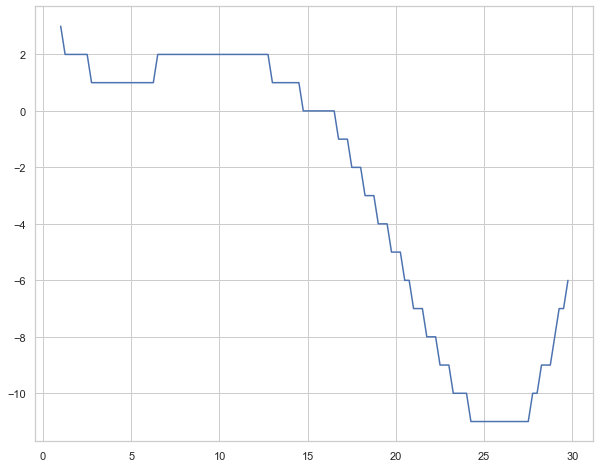

In [164]:
b = np.arange(1, 30, 0.25)

def h(x):
    return np.int(sin(x/5) * exp(x/10) + 5*exp(-x/2))
myfunction2 = np.vectorize(h)
c = myfunction2(b)

plt.plot(b,c)

### 3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.


In [196]:
scipy.optimize.minimize(method='BFGS', fun=h, x0=30)

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

### 4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. 
Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.


In [192]:
scipy.optimize.differential_evolution(h, [(1,30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([26.50159719])

### 5. Обратите внимание на то, что полученные ответы различаются. 
Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции.   
Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).


### 6. Выполнив это задание, 
вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент.

Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.